In [2]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

## Reading the data

In [3]:
df=pd.read_csv("data",sep='\t',names=["Label","Message"])

### Exploring the data 

In [4]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.Label.unique() 

array(['ham', 'spam'], dtype=object)

In [6]:
df.isnull().sum() ## checking for null values 

Label      0
Message    0
dtype: int64

<AxesSubplot: xlabel='Label', ylabel='count'>

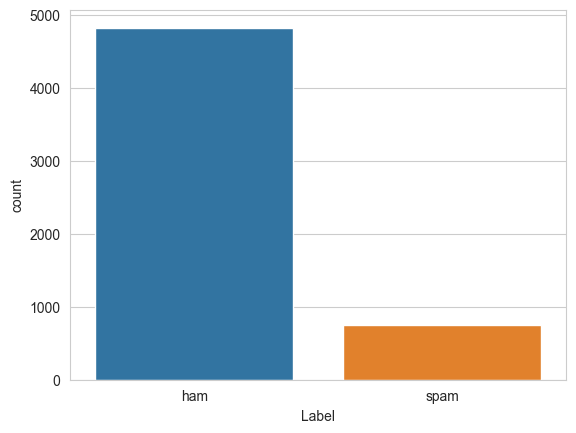

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Label',data=df)

### Preprocessing the data 

In [8]:
def preprocessing(text):
    """Changing text to lowercase ,removing extra spaces and cleaning the text.
    """
    text= text.lower().strip() 
    
    text=re.sub('[^a-zA-Z]',' ',text)
    
    text=re.sub(' +', ' ', text)
    return text

In [9]:
df['Message']=df['Message'].apply(preprocessing)

In [10]:
df.head()

,Label,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [11]:
## Encoding 0 for ham and 1 for Spam

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
LE=LabelEncoder()
LE.fit(df["Label"])

LabelEncoder()

In [14]:
df["Label"]=LE.transform(df["Label"])

In [15]:
df

,Label,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives arou...
...,...,...
5567,1,this is the nd time we have tried contact u u ...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that so any other suggest...
5570,0,the guy did some bitching but i acted like i d...


<AxesSubplot: xlabel='Label', ylabel='count'>

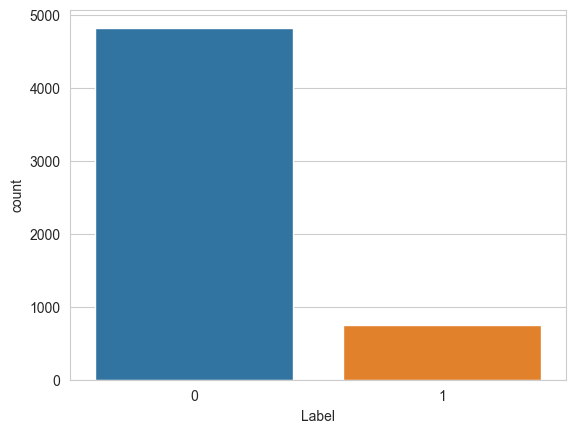

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Label',data=df)

### Converting messages to Embeddings

In [17]:
from sentence_transformers import SentenceTransformer

In [18]:
Encoder = SentenceTransformer('distiluse-base-multilingual-cased') # import the same model

In [19]:
embeddings=Encoder.encode(df["Message"]) # Encode text into vectors 

In [20]:
len(embeddings)

5572

In [21]:
embeddings[0]

array([ 5.34283035e-02, -2.38686930e-02,  4.93411021e-03, -6.96249679e-03,
        3.27754170e-02, -3.98076512e-02,  3.84433172e-03,  3.42428661e-03,
        1.63584128e-02,  3.99502032e-02,  4.18882677e-03,  3.01990043e-02,
       -1.37331197e-02,  2.19427589e-02,  4.93107643e-03, -3.27372663e-02,
        2.75634192e-02, -1.84482126e-03,  2.53685960e-03, -1.72956306e-02,
       -1.71510819e-02, -5.77042904e-03, -4.12951000e-02, -1.90557223e-02,
        2.66342852e-02, -8.71308427e-03, -2.96995249e-02,  5.02164401e-02,
        5.08541334e-03, -1.32683851e-02,  2.16076169e-02,  3.18137035e-02,
        8.75919219e-03, -1.41988052e-02,  3.90086393e-03, -6.08927943e-02,
        2.03155614e-02,  1.59705486e-02, -2.88936067e-02,  2.37819329e-02,
        6.89164619e-04,  1.86952744e-02,  3.14723738e-02,  3.59244384e-02,
        9.19888541e-02,  1.74739454e-02,  1.05361268e-02,  4.61963442e-04,
       -3.89837772e-02,  2.68828310e-03,  3.12509872e-02, -4.11770307e-05,
        9.66116507e-03,  

In [22]:
print(embeddings[0].shape)

(512,)


## Preparing the train and test data

In [23]:
x=embeddings
y=df["Label"].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [26]:
print("Training set of X and y-->",len(X_train),len(y_train))
print("Test set of X and y-->",len(X_test),len(y_test))

Training set of X and y--> 4457 4457
Test set of X and y--> 1115 1115


## Apply Classification algorithm

In [27]:
from sklearn.svm import SVC

In [28]:
classifier=SVC(kernel='linear')

In [29]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
y_pred_svc=classifier.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred_svc)

0.9838565022421525

### When your dataset is imbalanaced,Matrix gives us more clearity than the accuracy matrix 

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm=confusion_matrix(y_test,y_pred_svc)

## Visualize the matrix 

C:\Users\shidd\AppData\Local\Temp\ipykernel_8956\2139991391.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\shidd\AppData\Local\Temp\ipykernel_8956\2139991391.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


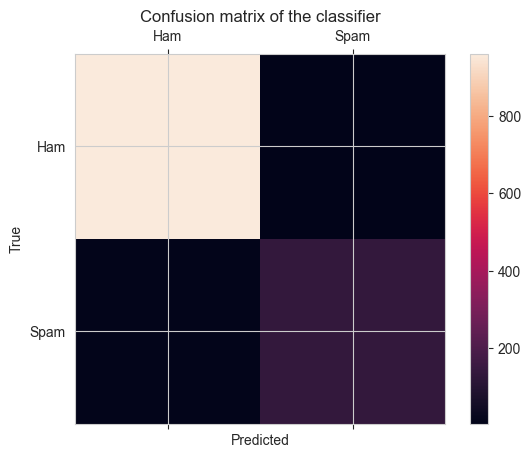

[[960   6]
 [ 12 137]]


In [35]:
labels = ['Ham', 'Spam']
cm=confusion_matrix(y_test,y_pred_svc)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

## Predicting for new input 

In [36]:
# We have trained our model 0 for ham and 1 for Spam
def prediction(predict_text):
    predict_data=Encoder.encode([predict_text])
    if classifier.predict(predict_data)[0]>0:
        return "Spam"
    else:
        return "Ham"

In [37]:
prediction("Klicken Sie hier, um das Preisgeld zu erhalten")

'Ham'